Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics  import confusion_matrix, accuracy_score, classification_report , plot_confusion_matrix

Loading the data

In [2]:
df=pd.read_csv('music.csv')
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


Exploratory Data analysis

In [3]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [4]:
df.isnull().sum()

age       0
gender    0
genre     0
dtype: int64

Data Preprocessing

In [5]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [6]:
x

array([[20,  1],
       [23,  1],
       [25,  1],
       [26,  1],
       [29,  1],
       [30,  1],
       [31,  1],
       [33,  1],
       [37,  1],
       [20,  0],
       [21,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [30,  0],
       [31,  0],
       [34,  0],
       [35,  0]], dtype=int64)

In [7]:
y

array(['HipHop', 'HipHop', 'HipHop', 'Jazz', 'Jazz', 'Jazz', 'Classical',
       'Classical', 'Classical', 'Dance', 'Dance', 'Dance', 'Acoustic',
       'Acoustic', 'Acoustic', 'Classical', 'Classical', 'Classical'],
      dtype=object)

Encoding Categorical Data

In [8]:
le=LabelEncoder()
y=le.fit_transform(y)

In [9]:
y

array([3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1])

Splitting the data into training and testing sets

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=101)

In [11]:
x_train

array([[20,  1],
       [34,  0],
       [26,  0],
       [30,  1],
       [21,  0],
       [29,  1],
       [37,  1],
       [20,  0],
       [35,  0],
       [27,  0],
       [33,  1],
       [31,  0],
       [31,  1],
       [25,  0]], dtype=int64)

In [12]:
y_train

array([3, 1, 0, 4, 2, 4, 1, 2, 1, 0, 1, 1, 1, 2])

Loading Machine Learning Model

In [13]:
model=DecisionTreeClassifier()


Parameter Hypertuning

In [14]:
param_grid={ 'max_depth':[3,5,6,7,8],
            'max_leaf_nodes':[3,5,6,7,8]}
grid_model=GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        cv=5)
grid_model.fit(x_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_leaf_nodes': [3, 5, 6, 7, 8]})

In [15]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

Model Building and Training

In [16]:
model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)

Plotting Decision Tree

[Text(387.5, 528.5, 'X[0] <= 30.5\ngini = 0.724\nsamples = 14\nvalue = [2, 6, 3, 1, 2]'),
 Text(310.0, 377.5, 'X[0] <= 25.5\ngini = 0.719\nsamples = 8\nvalue = [2, 0, 3, 1, 2]'),
 Text(155.0, 226.5, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1, 0]'),
 Text(77.5, 75.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]'),
 Text(232.5, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(465.0, 226.5, 'X[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 0, 0, 2]'),
 Text(387.5, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(542.5, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]'),
 Text(465.0, 377.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]')]

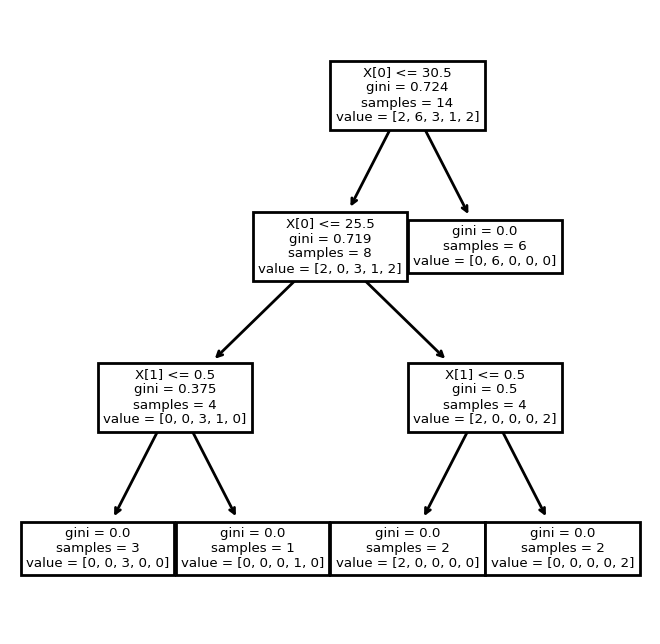

In [17]:
plt.figure(figsize=(4,4),dpi=200)
plot_tree(model)

Testing

In [18]:
preds=model.predict(x_test)
preds

array([4, 0, 3, 3])

Model Evaluation

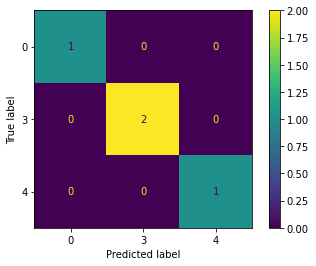

In [19]:
plot_confusion_matrix(model,x_test,y_test)

In [20]:
accuracy_score(y_test,preds)

1.0

In [21]:
classification_report(y_test,preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           3       1.00      1.00      1.00         2\n           4       1.00      1.00      1.00         1\n\n    accuracy                           1.00         4\n   macro avg       1.00      1.00      1.00         4\nweighted avg       1.00      1.00      1.00         4\n'

Testing Model using outside data

In [22]:
label={0:"Acoustic",1:"Classical",2:"Dance",3:"Hip-Hop",4:"Jazz"}
age=int(input("Enter your age"))
gender=int(input("Enter gender- 0 for female and 1 for male:"))
result=model.predict([[age,gender]])
print("Prediction: You love "+label[result[0]])

Enter your age18
Enter gender- 0 for female and 1 for male:1
Prediction: You love Hip-Hop
